In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

Label description of 10 categories

*   0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot



In [ ]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0][10]  #images

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
       202,   0], dtype=uint8)

In [ ]:
y_train #labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(y_test)

10000

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train.shape

(60000, 28, 28)

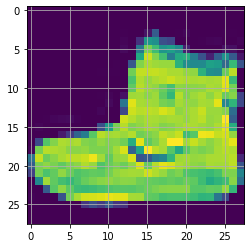

In [ ]:
plt.imshow(x_train[0])
plt.grid(True)
# plt.show()

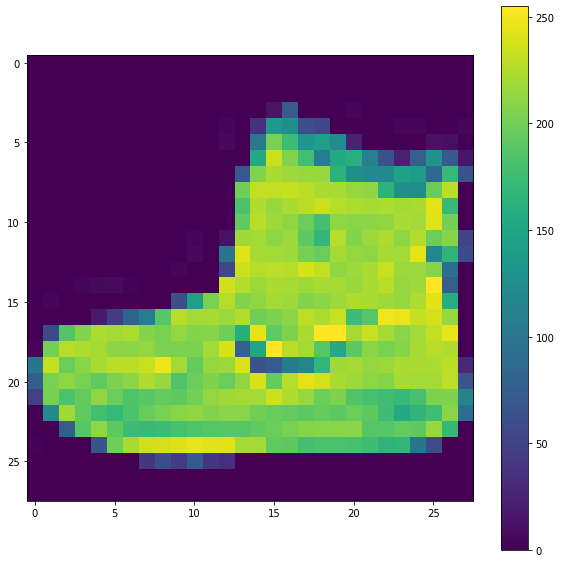

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
# plt.show()

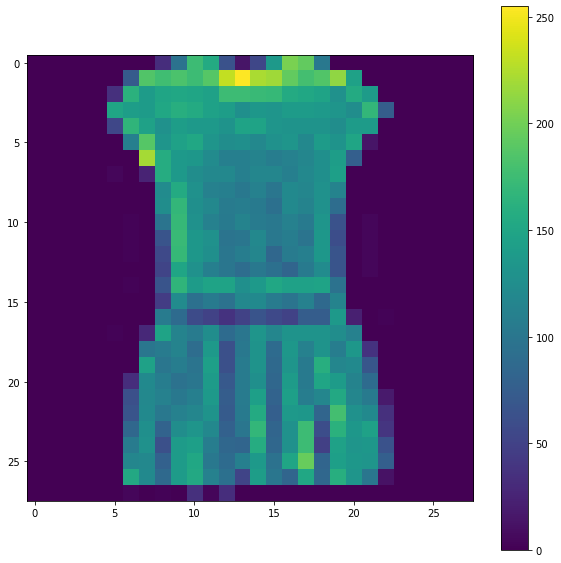

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
# plt.show()

range 0 - 255

In [ ]:
x_train.max()

255

In [ ]:
x_test.max()

255

Normalizing

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train.max())
print(x_test.max())

1.0
1.0


In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

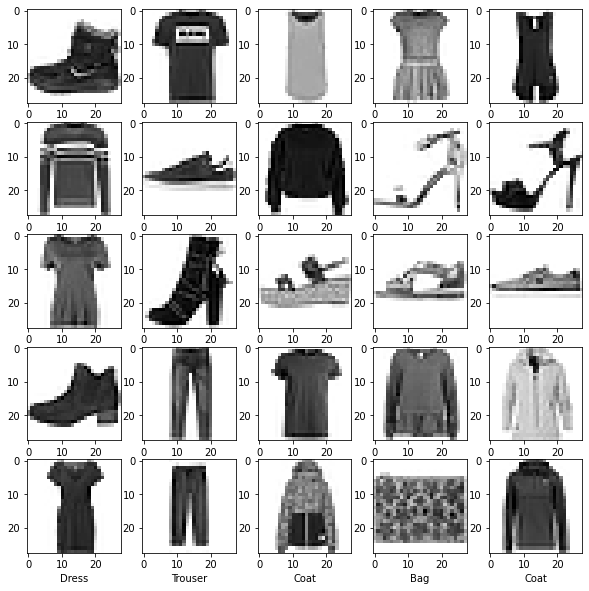

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) #creating a 5 * 5 matrix like subplot
  plt.xticks()
  plt.yticks()
  plt.imshow(x_train[i], cmap=plt.cm.binary) #convert to binary
  plt.xlabel(class_names[y_train[i]]) #print labels below images

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)), # (28,28) is the image shape obtained by x_train.shape/x_test.shape
     tf.keras.layers.Dense(128,activation='relu'), # 128 is random no.
     tf.keras.layers.Dense(10)      # 10 beacuse our output is 10 digits (0-9)
    ]
)

In [ ]:
model.layers

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.01762325, -0.04818081,  0.03153843, ..., -0.01480994,
          0.01764061,  0.05159163],
        [ 0.00437608,  0.05624358, -0.0273138 , ..., -0.02782731,
         -0.0330618 , -0.07621843],
        [ 0.00971015,  0.02252982,  0.02190308, ...,  0.04183044,
         -0.0257048 , -0.06668915],
        ...,
        [-0.07940685, -0.03552057, -0.01782827, ...,  0.06070695,
         -0.02189496,  0.04306716],
        [-0.06924561, -0.03913958,  0.07884534, ...,  0.08047957,
         -0.02151995,  0.03940736],
        [ 0.03786474,  0.06030213, -0.08012722, ..., -0.00559361,
          0.03987499, -0.0352624 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
model.input_shape

(None, 28, 28)

In [ ]:
model.output_shape

(None, 10)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6306 - accuracy: 0.7829
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8664
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8791
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8924
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8970
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9024
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9046
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9090
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [ ]:
model.evaluate(x_test,y_test,verbose=2) #verbose = 0 will be silent , 1 will show animation and 2 will be just epoch 1/10

313/313 - 0s - loss: 0.3485 - accuracy: 0.8906


[0.3485162556171417, 0.8906000256538391]

In [ ]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose = 2)
print('Test accuracy',test_accuracy)

313/313 - 0s - loss: 0.3485 - accuracy: 0.8906
Test accuracy 0.8906000256538391


In [ ]:
probability_model = tf.keras.Sequential(
    [
     model,
     tf.keras.layers.Softmax() #adding activation function to output layer since we did not do that before
    ]
)

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[:5]

array([[1.1040775e-09, 6.6452706e-09, 4.1023920e-11, 3.7256449e-14,
        2.0266940e-08, 4.9015094e-04, 1.1650962e-08, 1.5025225e-03,
        2.5995870e-09, 9.9800736e-01],
       [2.9458944e-05, 2.9670950e-18, 9.9986959e-01, 5.9551040e-13,
        4.0900632e-05, 3.3517931e-14, 6.0063241e-05, 3.2159032e-17,
        2.1187519e-15, 5.1960606e-19],
       [5.3256229e-18, 1.0000000e+00, 7.4883463e-22, 1.1562343e-15,
        3.3468935e-19, 1.1858066e-27, 1.3207374e-16, 2.4295332e-38,
        9.4742323e-18, 1.7645478e-37],
       [4.3079462e-14, 1.0000000e+00, 1.9271233e-16, 1.1154713e-09,
        1.3734459e-13, 1.4012431e-24, 1.0024126e-10, 1.8749942e-29,
        1.3298520e-13, 2.4138327e-27],
       [5.0109066e-02, 5.4183652e-10, 1.9872183e-04, 2.9044535e-05,
        7.4667521e-05, 2.7519405e-09, 9.4958854e-01, 1.0398401e-08,
        4.6676409e-08, 1.4173553e-10]], dtype=float32)

In [ ]:
print('max',predictions[0].max())
predictions[0]

max 0.99800736


array([1.1040775e-09, 6.6452706e-09, 4.1023920e-11, 3.7256449e-14,
       2.0266940e-08, 4.9015094e-04, 1.1650962e-08, 1.5025225e-03,
       2.5995870e-09, 9.9800736e-01], dtype=float32)

In [ ]:
for i in range(len(class_names)):
  print(i," ",class_names[i])

0   T-shirt/top
1   Trouser
2   Pullover
3   Dress
4   Coat
5   Sandal
6   Shirt
7   Sneaker
8   Bag
9   Ankle boot


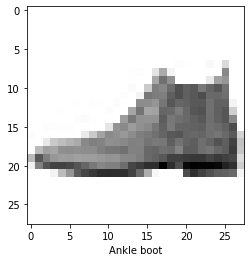

In [ ]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]]) 
plt.show()

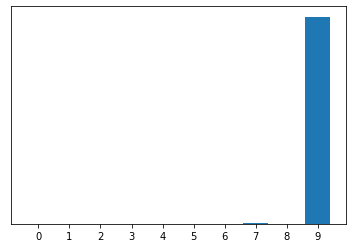

In [ ]:
plt.bar(list(range(10)),predictions[0])
plt.xticks(range(10))
plt.yticks([])
plt.show()

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
class_names[np.argmax(predictions[1])] 

'Pullover'

([], <a list of 0 Text major ticklabel objects>)

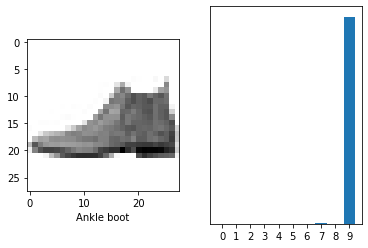

In [ ]:
plt.subplot(121)
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])

plt.subplot(122)
plt.bar(list(range(10)),predictions[0])

plt.xticks(range(10))
plt.yticks([])    